In [2]:
# 선그래프(line plot)
# 예시코드: 시도 간 인구 이동 데이터셋을 활용(시도별전출입인구수.xlsx)
# 서울 시에서 다른 지역으로 이동한 인구수 파악

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_excel(r'C:\/Users/Playdata/OneDrive/Documents/10주차/금요일 최회련님/시도별전출입인구수.xlsx', header=0)#header = 0 컬럼으로 지정한것

display(df.head())

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [3]:
#서울 -> 각 지역의 전출에 필요한 데이터 형태로 전처리

df = df.fillna( method='ffill')#누락값을 전 데이터의 값으로 채움
df.head()
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
mask1 = df['전출지별'].isin(['서울특별시']) & ~df['전입지별'].isin(['서울특별시'])
df_seoul = df[mask]
df_seoul

#전출지별 컬럼은 필요없음, 서울에서의 이전이므로, 모든 데이터가 서울로 통일
df_seoul = df_seoul.drop(['전출지별'],axis=1)

# 컬럼이름 변경
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [13]:
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System....')

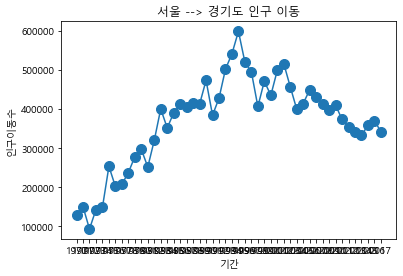

In [20]:
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System....')
    
#선그래프 작성 코드
to_ky = df_seoul.loc['경기도']
font = {'fontname': 'Malgun Gothic'}#그래프내의 한글처리를 위한 코드
#선그래프로 확인, x,y 축 선정, 시리지의 인덱스를 x축, 데이터를 y축으로
plt.plot(to_ky.index, to_ky.values, marker='o', markersize=10)
#plt.plot(to_ky)#위의 코드와 동일 결과
#그래프에 제목, 축 이름
plt.title('서울 --> 경기도 인구 이동', font)
plt.xlabel('기간',font)
plt.ylabel('인구이동수',font)
plt.show() #변경사항 저장하고 그래프 출력

# 그래프에서 x 축의 라벨이 겹침 현상
# 공간확보 부족현상이므로 공간 확보 필요
#figure 사이즈를 늘려주거나, x값들의 값을 옆으로 틀어준다


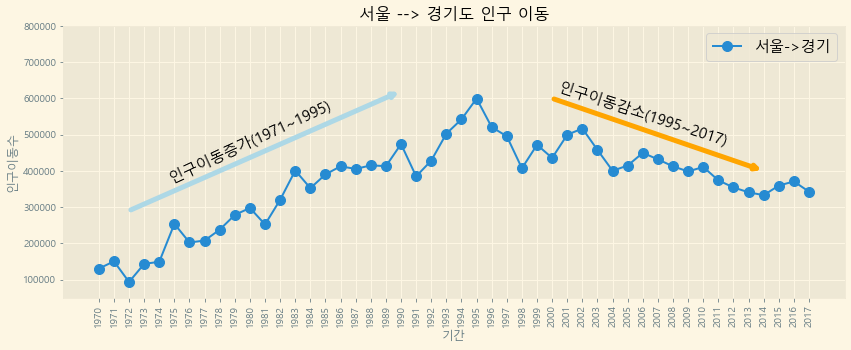

In [75]:
#그래프의 라벨에 공간 확보를 위한 방법
# figure 함수로 그림틀의 가로 사이즈를 더 크게 설정
# xticks 함수를 활용하여 x 축 눈금 라벨을 반시계 방향으로 90 도 회전
# xticks 의 rotation = 90 으로 입력해도 됨

#선그래프로 확인, x,y 축 선정, 시리지의 인덱스를 x축, 데이터를 y축으로
#선그래프 작성 코드
to_ky = df_seoul.loc['경기도']
font = {'fontname': 'Malgun Gothic'}#그래프내의 한글처리를 위한 코드
plt.figure(figsize = (14, 5))
plt.xticks(rotation = 90)

#선그래프로 확인, x,y 축 선정, 시리지의 인덱스를 x축, 데이터를 y축으로
plt.plot(to_ky.index, to_ky.values, marker='o', markersize=10)

#plt.plot(to_ky)#위의 코드와 동일 결과

#그래프에 제목, 축 이름
plt.title('서울 --> 경기도 인구 이동', font)
plt.xlabel('기간',font)
plt.ylabel('인구이동수',font)
plt.style.use('Solarize_Light2')
plt.legend(labels=['서울->경기'],loc='best',fontsize=15)
#plt.show() #변경사항 저장하고 그래프 출력

#그래프에 대한 설명을 덧붙이는 주석 사용법
# annotate() 사용
# 주석 넣을 여백 공간 확보는 ylim 사용, y축 공간을 확장
# plt.annotate 등에서 (x,y)는 x 는 인덱스 번호, y는 y축의 인구수로 작성(데이터)

plt.ylim(50000, 800000) #최소,최대입력

#화살표주석
plt.annotate('',
        xy=(20,620000), #화살표의 머리부분(끝점)
        xytext = (2, 290000), #화살표의 꼬리 부분(시작점)
        xycoords='data', # 좌표체계
        arrowprops = dict(arrowstyle='->', color='lightblue',lw=5),)

#텍스트 주석
plt.annotate('인구이동증가(1971~1995)', #텍스트
        xy = (10,370000), # 텍스트 위치 기준점
        rotation = 25, # 텍스트 회전각도
        va='baseline', # 텍스트 상하 정렬,center,top,bottom
        ha='center', # 텍스트 좌우 정렬, center,left,right
        fontsize=15,) # 텍스트크기

#그래프에 대한 설명을 덧붙이는 주석 사용법
# annotate() 사용
# 주석 넣을 여백 공간 확보는 ylim 사용, y축 공간을 확장
# plt.annotate 등에서 (x,y)는 x 는 인덱스 번호, y는 y축의 인구수로 작성(데이터)

plt.ylim(50000, 800000) #최소,최대입력

#화살표주석
plt.annotate('',
        xy=(44,400000), #화살표의 머리부분(끝점)
        xytext = (30, 600000), #화살표의 꼬리 부분(시작점)
        xycoords='data', # 좌표체계
        arrowprops = dict(arrowstyle='->', color='orange',lw=5),)

#텍스트 주석
plt.annotate('인구이동감소(1995~2017)', #텍스트
        xy = (36,470000), # 텍스트 위치 기준점
        rotation = -18, # 텍스트 회전각도
        va='baseline', # 텍스트 상하 정렬,center,top,bottom
        ha='center', # 텍스트 좌우 정렬, center,left,right
        fontsize=15,) # 텍스트크기

plt.show()



<Figure size 432x288 with 0 Axes>

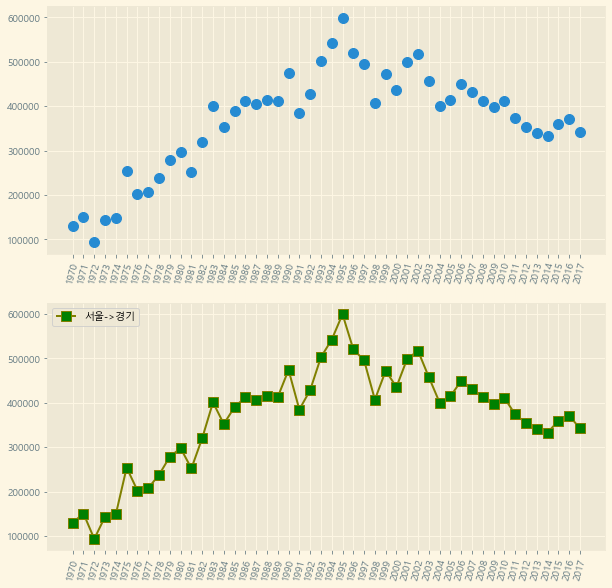

In [80]:
# 다 수의 그래프를 위한 화면 분할
# axe 객체 생성
# figure()로 그래프를 그리는 그림틀(fig) 생성
# figure(figsize= ): 가로, 세로의 그림틀 생성
# figure의 객체에 add_subplot() 메소드를 적용하여 그림틀을 여러 개 분할  axe 생성
# add_subplot(행크기, 열크기, 서브플롯순서)

plt.clf() #이전 그림을 지우고 새로 그림

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,1,1)#각 각 분할 된 화면에 그래프를 넣는다.
ax2 = fig.add_subplot(2,1,2)#각 각 분할 된 화면에 그래프를 넣는다.

ax1.plot(to_ky, 'o',markersize=10)
ax2.plot(to_ky, marker='s', markerfacecolor='green',markersize=10,color='olive',
linewidth=2,label='서울->경기')
ax2.legend(loc='upper left')

ax1.set_xticklabels(to_ky.index,rotation=75)
ax2.set_xticklabels(to_ky.index,rotation=75)

plt.show()

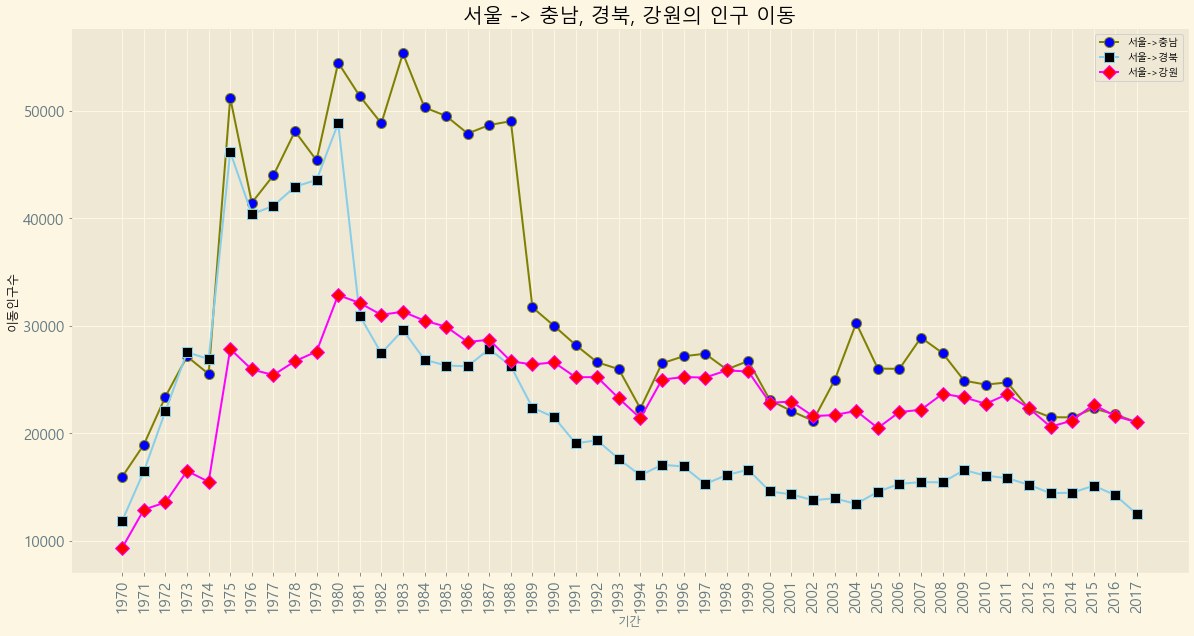

In [81]:
col_year = list(map(str, range(1970,2018)))
df3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_year]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(col_year,df3.loc['충청남도',:],marker='o',markerfacecolor='blue',
    markersize=10,color='olive',linewidth=2,label='서울->충남')

ax.plot(col_year,df3.loc['경상북도',:],marker='s',markerfacecolor='black',
    markersize=10,color='skyblue',linewidth=2,label='서울->경북')
ax.plot(col_year,df3.loc['강원도',:],marker='D',markerfacecolor='red',
    markersize=10,color='magenta',linewidth=2,label='서울->강원')
ax.legend(loc='upper right')

ax.set_title('서울 -> 충남, 경북, 강원의 인구 이동',size = 20)

ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동인구수',size=12, color='black')
ax.set_xticklabels(col_year,rotation=90)
#축 눈금 라벨 크기
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
plt.show()

In [87]:
#matplotlib에서 사용할 수 있는 색상

import matplotlib
colors={}

for name, hex_ in matplotlib.colors.cnames.items():
    colors[name] = hex_ #16진수의 표현법
    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

In [88]:
#각 열의 데이터의 선 그래프와 x 축 사이의 공간에 색이 입혀진 그래프
# 색의 투명도(alpha)는 기본과 0.5 ( 0~1 사이 범위)
# plot 함수의 속성 kind 에 ‘area’ 만 추가
# 그래프 누적의 여부 설정은 stacked 속성 사용
# 누적할 시는 stacked = True
# 각 열의 패턴과 함께, 열 전체의 합계가 어떻게 변하는지를 파악할 수 있음
# 서울 -> 충남, 경북, 강원, 전남으로 이동한 이동 인구수 추이
# 데이터 처리

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True) #컬럼인 전입지를 인덱스로
display(df_seoul)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose() #컬럼인 col_years를 인덱스로 인덱스인 전입지를 컬럼으로
                        #df_4.T 로도 동일

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


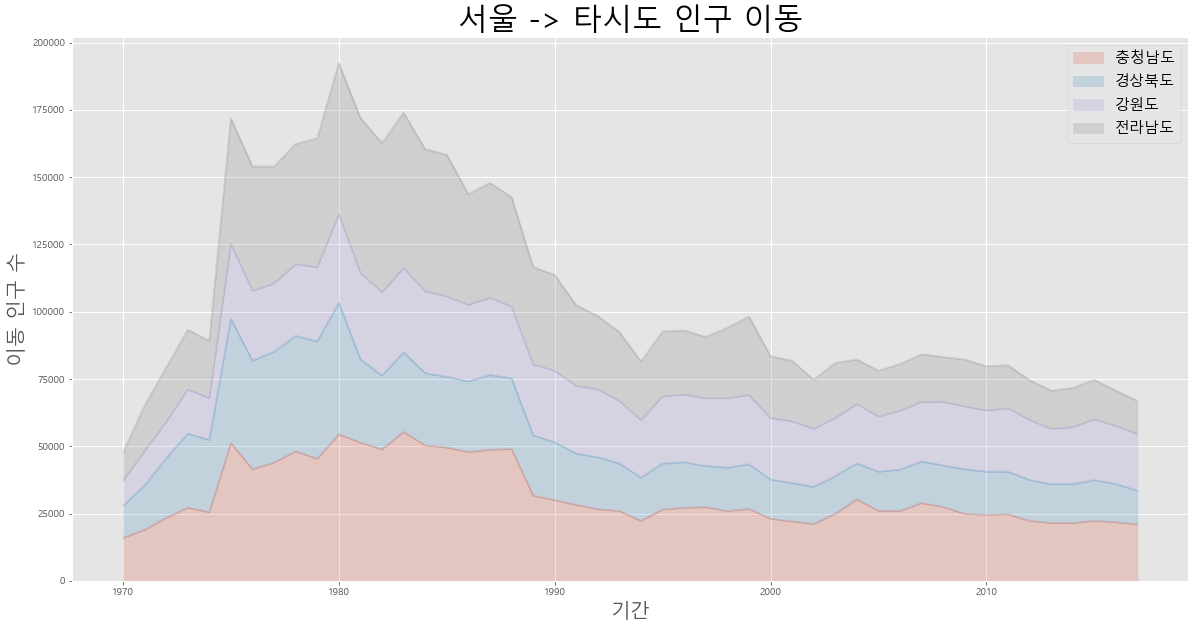

In [92]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

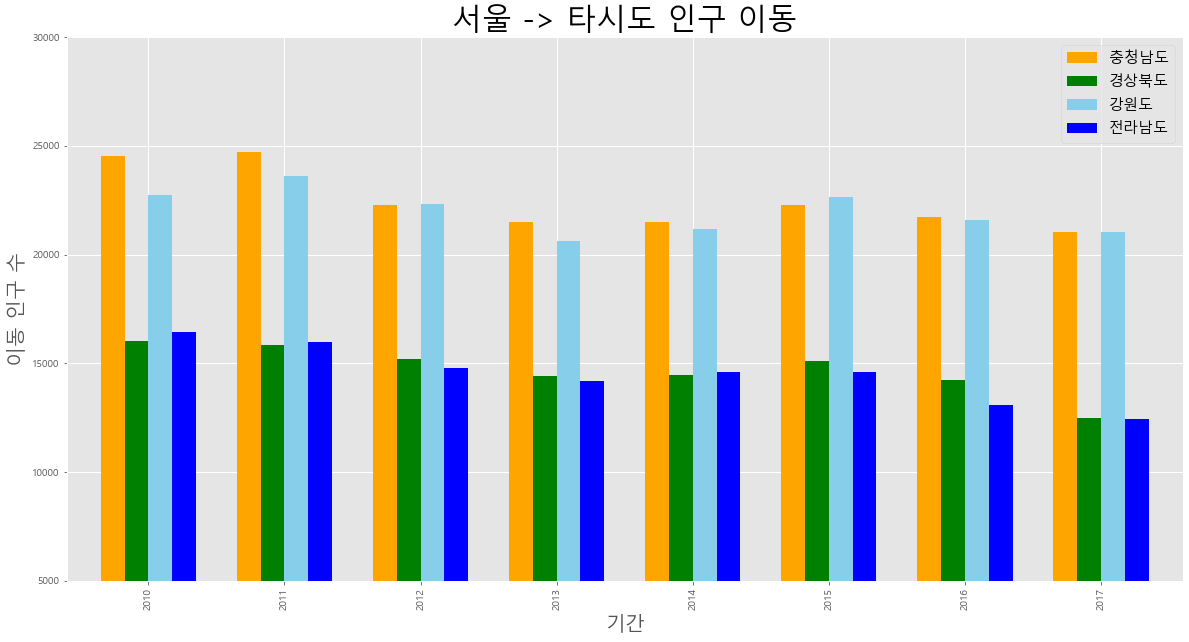

In [93]:
# 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대를 표현
# 세로형과 가로형 막대 그래프가 존재
# 세로형 막대 그래프는 시간적 차이가 나는 두 점에서 데이터 값의 차이를 잘 설명
# 시계열 데이터 표현에 적합
# plot 메소드의 속성 kind = ‘bar’로 지정
# 가로형 막대 그래프는 각 변수 사이 값의 크기 차이 설명에 적합
# plot 메소드의 속성 kind = ‘barh’ 로 지정
# 예시에 사용할 데이터는 앞 장과 동일
# 서울 -> 충남, 경북, 강원, 전남의 이동 인구

col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.T
df_4.index = df_4.index.map(int)

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

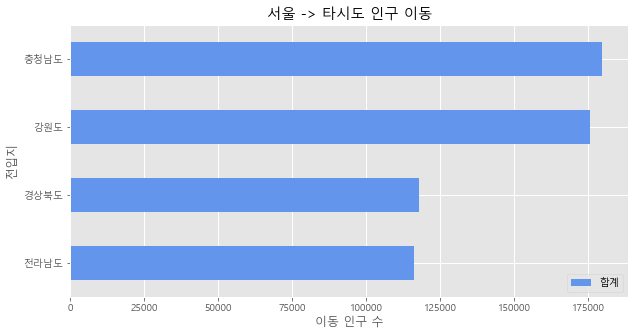

In [94]:
#가로형 막대 그래프
# 2010~2018년 사이의 서울  타도시(충남,경북,강원,전남)의 총 이동 인구 추이
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue',
width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

In [99]:
#시각화 도구 - 보조축
#데이터 처리

plt.style.use('ggplot') # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임 변환
df = pd.read_excel('./남북한발전전력량.xlsx', convert_float=True)
display(df)

df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100 

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


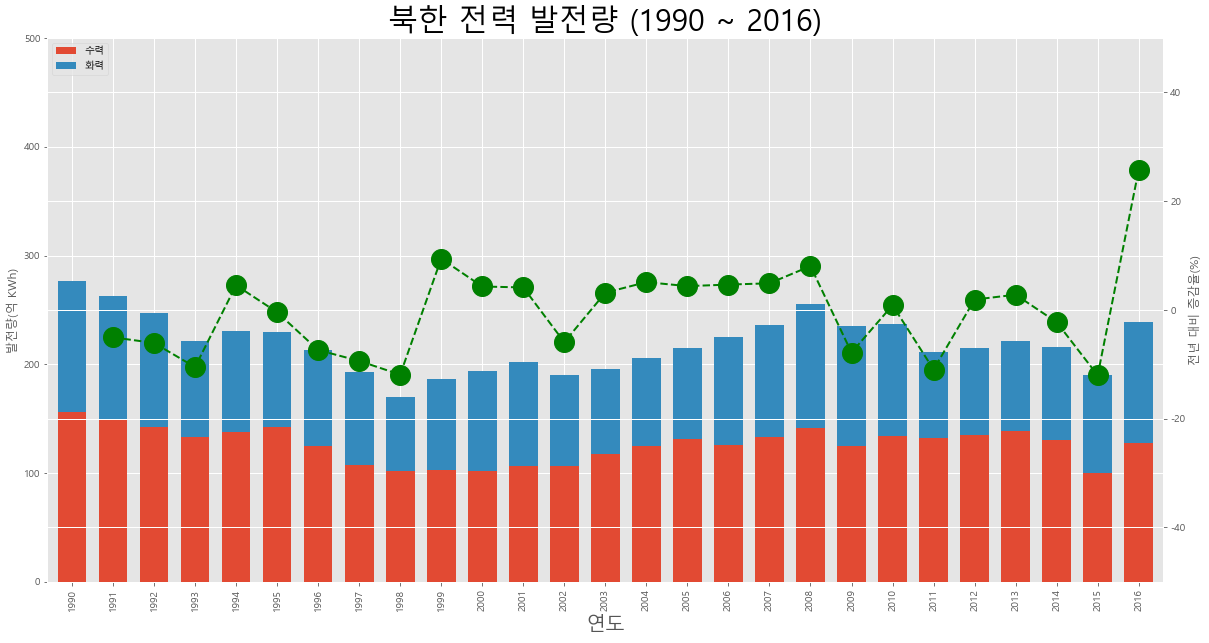

In [103]:
# 그래프 그리기
# 2축 그래프 그리기

ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx() #보조축 
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20,
color='green', label='전년대비 증감율(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')
plt.savefig('./north_energy.png') #그림저장
plt.savefig("./ north_energy1.png", transparent=True)
plt.show()

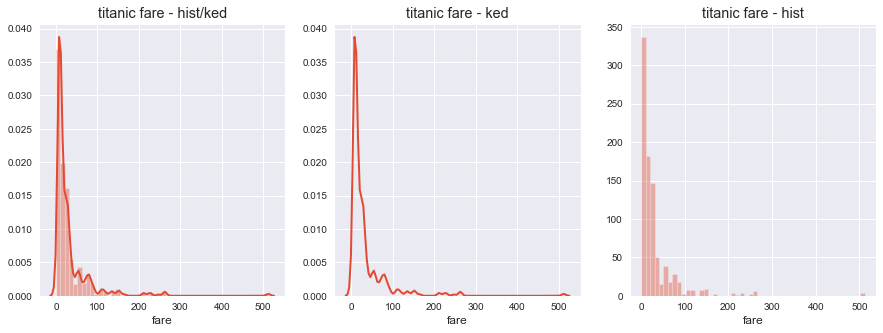

In [107]:
#시각화 도구 - Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값
sns.distplot(titanic['fare'], ax=ax1)

# hist=False
sns.distplot(titanic['fare'], hist=False, ax=ax2)

# kde=False
sns.distplot(titanic['fare'], kde=False, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

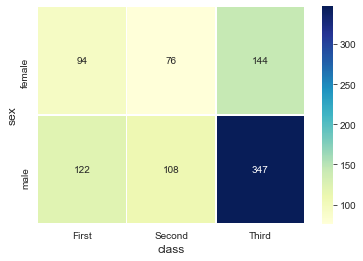

In [109]:
#히트맵 - Seaborn

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table, # 데이터프레임
        annot=True, fmt='d', # 데이터 값 표시 여부, 정수형 포맷
        cmap='YlGnBu', # 컬러 맵
        linewidth=.5, # 구분 선
        cbar=True) # 오른쪽 컬러 바 표시 여부 

plt.show()

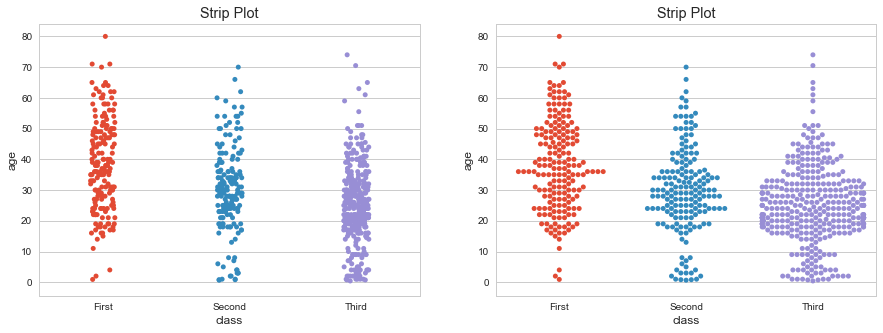

In [111]:
#범주형 데이터의 산점도
#stripplot() 과 swarmplot()(군집이라는 뜻) 의 두 형태가 있음
#swarmplot 은 데이터의 분산까지 고려하여 데이터 포인트가 서로 중복되지
#않도록 그림, 즉 데이터가 퍼져있는 정도를 입체적으로 확인 가능

sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x="class", #x축 변수
        y="age", #y축 변수
        data=titanic, #데이터셋 - 데이터프레임
        ax=ax1) #axe 객체 - 1번째 그래프

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X)
sns.swarmplot(x="class", #x축 변수
        y="age", #y축 변수
        data=titanic, #데이터셋 - 데이터프레임
        ax=ax2) #axe 객체 - 2번째 그래프

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

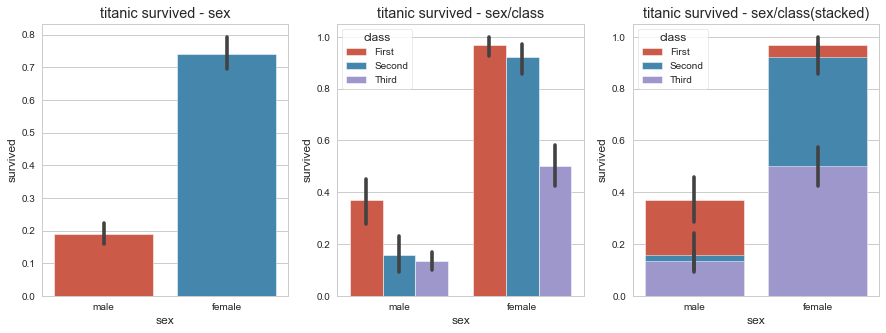

In [112]:
# 막대그래프
# barplot()
# hue 옵션은 누적된 순으로 실행
# 한 막대에서 누적된 모습을 보여주는 옵션: dodge=False

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

# x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic,
ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()